In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [4]:
#With seed set, we will get same set of random numbers everytime
np.random.seed(10)
#Any number can be used in the place of 10. Seed function keeps previously generated value. In the beginning it uses system time as previously generated
#value

In [5]:
population_ages1 = stats.poisson.rvs(mu = 35, size = 150000)
#Ages of adults with mean of 35.

In [6]:
population_ages2 = stats.poisson.rvs(mu = 10, size = 100000)
#Ages of kids with mean of 10.

In [7]:
population_ages = np.concatenate((population_ages1, population_ages2))
#This creates a vector of 2.5M size.  

In [8]:
population_ages.mean()

25.002372

In [11]:
sample_ages = np.random.choice(a = population_ages, size = 500)
print(sample_ages.mean())
print(population_ages.mean() - sample_ages.mean())

25.334
-0.3316279999999985


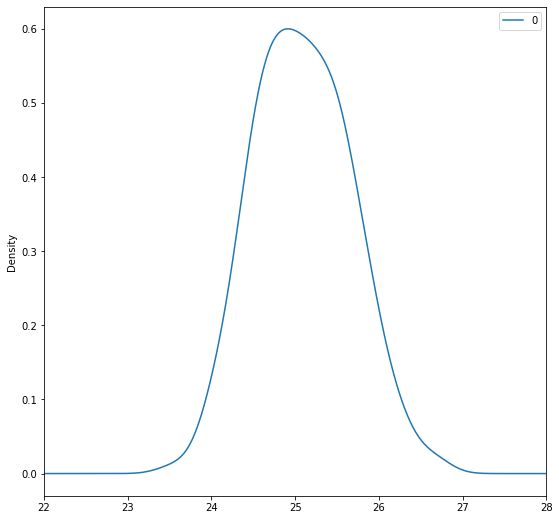

In [12]:
np.random.seed(10)
#To get same random numbers again and again in this block
point_estimates = []
for x in range(200):
  sample = np.random.choice(a = population_ages, size = 500)
  point_estimates.append(sample.mean())

pd.DataFrame(point_estimates).plot(kind = "density", figsize=(9,9), xlim=(22, 28))
#The graph is density graph

In [13]:
#The above graph clearly says distribution of sample means follow normal distribution and mean is actually close true mean of population.

In [16]:
#Calculating 95% confidence interval
np.random.seed(10)
sample_size = 1000
sample = np.random.choice(a = population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q=0.975) # (1-a)*100% = 95%
                                      # a=0.05
                                      # a/2 = 0.025
                                      # 1-0.025 = 0.975
                                  
print("Z Score for 95% interval is:")
print(z_critical)

Z Score for 95% interval is:
1.959963984540054


In [17]:
pop_standard_deviation = population_ages.std()
margin_of_error = z_critical * (pop_standard_deviation/math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("confidence interval: ")
print(confidence_interval)

confidence interval: 
(23.70306406882683, 25.34293593117317)


In [18]:
#The true mean of population ages is present in the confidence interval.